# Project 1: SAT & ACT Analysis

## Executive Summary

### Problem Statement

The SAT and ACT are two of the most commonly accepted standardised tests used in college applications. The general perception is that students would typically take either test (i.e. not both) if they intend to apply for college in the United States. Using data for both tests in 2017 and 2018, we want to investigate how the two tests and their components (e.g. Verbal/Reading, Math) are correlated such that we can use one variable to make inferences about another. We also want to pick out any trends and anomalies that might be present in the data, and understand the events that could explain these data points.

### How it was carried out
We started off with a provided set of data for the two tests in 2017, cleaned it up, then manually created an additional set of data points for 2018. Besides running quick Pandas functions (e.g. `describe`), we also visualised the features using different types of charts (histogram, scatterplot, boxplot) to look for interesting trends in our data and to explain them.

### Analysis
Broadly, we found out that participation rates in SAT and ACT are strongly negatively correlated (about -0.85). 

We also found that, with the exception of ACT 2017 Science scores, performance in one subject score is strongly positively correlated with performance in another subject in the same standardised test.

However, subject scores tend to be strongly negatively correlated between SAT and ACT.

Another discovery is that within these two years of data, high participation rates in a given test tends to damp down the test scores. 

We also found out from looking up real world info that many states that have extremely high participation rates tend to be so because of state-wide requirements for students to sit for either of the tests, such as in Colorado which mandated SAT. 


### Shortcomings
* The data timeframe is just two years, which is quite short-term, and likely to be heavily impacted by neaby events e.g. 2017 ruling in Colorado that makes SAT testing mandatory. A longer timeframe would likely smooth out sudden spikes/dips caused by major events.
* Although participation percentages are a good starting point, it will also be helpful to know actual number of test-takers for a given test in a given state. This will help us better assess and understand trends.  

### Recommendations
* Take a longer timeframe view for the analysis by working with at least 5 years of data.
* Make testing mandatory and free, and administer tests during school hours on school premises to provide more opportunities to more students to apply for college.


## Content:
### Extract, Transform, Load

  * [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
  * [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
    
### Data Exploration & Analysis
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)

### Context and Recommendations
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# reading 10 rows of sat_2017 data
pd.DataFrame(sat_2017).head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# eading 10 rows of act_2017 data
pd.DataFrame(act_2017).head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

### Answer ###
**SAT data**

SAT data has five attributes
- state (string)
- participation (string, with a percentage sign)
- evidence-based reading and writing (float)
- math (integer)
- total (integer)

**ACT data**

ACT data has seven attributes
- state (string)
- participation (string, with a percentage sign)
- english (float)
- math (float)
- reading (float)
- science (float)
- composite (float)

#### 4a. Does the data look complete? 

Answer:
Looking purely at the first 10 rows, it would seem as though the data for both sets are "complete" in the sense that there are no empty cells. 

It also seems like Participation values for both sets of data are currently of string type, so we'll need to typecast it for data analysis.

The full score structure of the SAT actually encompasses several other scores, such as scores for the Essay component, and cross-test scores. While these other scores are not included here, the data set covers the scores that are essential to discussions about SAT. 

Similarly, ACT also offers an optional writing component, which is not included in the data set. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


### Answer ###
#### SAT data ####

- Participation: min - 0, max - 100
- ERW: min - 200, max - 800
- Math: min - 200, max - 800
- Total: min - 400, max - 1600

From running describe(), it seems like there may be some erroneous data in the data set. The min value for ERW and Math should be between 200-800, but the minimum math score in the data is 52. There may be other scores that fall outside of the correct range.

####  ACT data ####
- Participation: min - 0, max - 100
- English: min - 1, max - 36
- Math: min - 1, max - 36
- Reading: min - 1, max - 36
- Science: min - 1, max - 36
- Composite: min - 1, max - 36

The data set for ACT does not appear to have any issues of data falling outside the correct range.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# Looking for the entries with the problematic Math score
display(sat_2017[sat_2017["Math"] < 200])



,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [8]:
# We know from the previous data display that the row concerned has index 20
# Math score updated with 524, using data provided at https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf-0
sat_2017.iloc[20, sat_2017.columns.get_loc("Math")] = 524


In [9]:
# verifying that the value has been correctly updated
sat_2017.iloc[20,:]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

### Answer:###

For both data sets, Participation should be float values. They're probably string values now because of the % sign.

Composite for ACT data set should also be a float. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
def ppn_to_float(ppn_var):
    
    ppn_var = ppn_var.replace("%", "")
    ppn_var = float(ppn_var)
    
    return ppn_var

In [13]:
sat_2017["Participation"] = sat_2017["Participation"].apply(ppn_to_float)

In [14]:
act_2017["Participation"] = act_2017["Participation"].apply(ppn_to_float)

In [15]:
display(sat_2017.dtypes)
display(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
# in search of corrupt values for Composite column
display(np.unique(act_2017["Composite"]))
act_2017["Composite"] = act_2017["Composite"].map(lambda string: float(string.replace("x", "")) if type(string) == str else ())


array(['17.8', '18.6', '18.7', '19.0', '19.1', '19.2', '19.4', '19.5',
       '19.7', '19.8', '20.0', '20.2x', '20.3', '20.4', '20.5', '20.7',
       '20.8', '21.0', '21.4', '21.5', '21.7', '21.8', '21.9', '22.0',
       '22.3', '22.6', '22.8', '23.6', '23.7', '23.8', '23.9', '24.0',
       '24.1', '24.2', '24.3', '25.2', '25.4', '25.5'], dtype=object)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [17]:
# Since scores in act_2017 are all in float, let's also cast the scores in sat_2017 to float. This will come in helpful when we do calculations later.
sat_2017 = sat_2017.astype({"Evidence-Based Reading and Writing": float, "Math": float, "Total": float})


- Display the data types again to confirm they are correct.

In [18]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [19]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [21]:
sat_2017_dict = {
    "State" : "sat_state_2017",
    "Participation" : "sat_participation_2017",
    "Evidence-Based Reading and Writing" : "sat_ewr_2017",
    "Math" : "sat_math_2017",
    "Total" : "sat_total_2017"
    }

sat_2017.rename(columns=sat_2017_dict, inplace=True)
sat_2017.head()


,sat_state_2017,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [22]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [23]:
act_2017_dict = {
    "State" : "act_state_2017",
    "Participation" : "act_participation_2017",
    "English" : "act_english_2017",
    "Math" : "act_math_2017",
    "Reading" : "act_reading_2017",
    "Science" : "act_science_2017",
    "Composite" : "act_composite_2017"
    }

act_2017.rename(columns=act_2017_dict, inplace=True)
act_2017.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|Min|Max|
|---|---|---|---|---|---|
|**state**|*object*|SAT|The state that the SAT data is from|_n.a._|_n.a._|
|**sat_participation_2017**<br>**sat_participation_2018**|*float*|SAT|SAT participation rate (in percentage) for a given state in a given  year|0%|100%|
|**sat_ewr_2017<br>sat_ewr_2018**|*float*|SAT|Average score for Evidence-Based Reading and Writing for a given state in a given  year|200|800|
|**sat_math_2017<br>sat_math_2017**|*float*|SAT|Average score for Math for a given state in a given year|200|800|
|**sat_total_2017<br>sat_total_2018**|*float*|SAT|Average total score for a given state in a given year, computed using EWR and Math scores|400|1600|
|**act_participation_2017<br>act_participation_2018**|*float*|ACT|ACT participation rate (in percentage) for a given state in a given  year|0%|100%|
|**act_english_2017<br>act_english_2017**|*float*|ACT|Average score for English for a given state in a given year|1|36|
|**act_math_2017<br>act_math_2018**|*float*|ACT|Average score for Math for a given state in a given year|1|36|
|**act_reading_2017<br>act_reading_2018**|*float*|ACT|Average score for Reading for a given state in a given year|1|36|
|**act_science_2017<br>act_science_2018**|*float*|ACT|Average score for Science for a given state in a given year|1|36|
|**act_composite_2017<br>act_composite_2018**|*float*|ACT|ACT Composite score for a given state in a given year|1|36|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
display(sat_2017.head())
display(sat_2017.tail())

,sat_state_2017,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


,sat_state_2017,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017
46,Virginia,65.0,561.0,541.0,1102.0
47,Washington,64.0,541.0,534.0,1075.0
48,West Virginia,14.0,558.0,528.0,1086.0
49,Wisconsin,3.0,642.0,649.0,1291.0
50,Wyoming,3.0,626.0,604.0,1230.0


In [25]:
display(act_2017.head())
display(act_2017.tail())

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [26]:
# act_2017 row 0 identified as the extra row
act_2017.drop(index=0, axis=0, inplace=True)

In [27]:
# verifying that the extra row has been successfully dropped
act_2017.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
combined_2017 = pd.merge(sat_2017,  act_2017, left_on="sat_state_2017", right_on="act_state_2017", how="inner")

# To assign the key to  a new variable
combined_2017["state"] = combined_2017["sat_state_2017"]
combined_2017.head()

,sat_state_2017,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,state
0,Alabama,5.0,593.0,572.0,1165.0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alabama
1,Alaska,38.0,547.0,533.0,1080.0,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,Alaska
2,Arizona,30.0,563.0,553.0,1116.0,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,Arizona
3,Arkansas,3.0,614.0,594.0,1208.0,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arkansas
4,California,53.0,531.0,524.0,1055.0,California,31.0,22.5,22.7,23.1,22.2,22.8,California


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
combined_2017.to_csv("../data/combined_2017.csv")


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
# importing act 2018 csv file
act_2018 = pd.read_csv("../data/act_2018_updated.csv")
display(act_2018.head())
act_2018.shape

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


(51, 7)

In [31]:
# inspecting act_2018 data set for rows with "National" in State column. State values set to lowercase for thorough comparison
act_2018[act_2018["State"].str.lower() == "national"]

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [32]:
# no such row found, so we will proceed

In [33]:
# checking dtypes
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [34]:
# renaming columns first for ease of data clean-up, using a column dictionary
act_2018_dict = {
    "State" : "act_state_2018",
    "Percentage of Students Tested" : "act_participation_2018",
    "Average English Score" : "act_english_2018",
    "Average Math Score" : "act_math_2018",
    "Average Reading Score" : "act_reading_2018",
    "Average Science Score" : "act_science_2018",
    "Average Composite Score" : "act_composite_2018"
    }

act_2018.rename(columns=act_2018_dict, inplace=True)
act_2018.head()

,act_state_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [35]:
# since act_participation_2018 is all integer, we only need to convert it to float
act_2018 = act_2018.astype({"act_participation_2018": float}, inplace=True)


In [36]:
# verifying successful conversation of datatypes
act_2018.dtypes

act_state_2018             object
act_participation_2018    float64
act_composite_2018        float64
act_english_2018          float64
act_math_2018             float64
act_reading_2018          float64
act_science_2018          float64
dtype: object

In [37]:
# inspecting for null values
act_2018.isnull().sum()

act_state_2018            0
act_participation_2018    0
act_composite_2018        0
act_english_2018          0
act_math_2018             0
act_reading_2018          0
act_science_2018          0
dtype: int64

In [38]:
# importing sat 2018 csv file
sat_2018 = pd.read_csv("../data/sat_2018.csv")
display(sat_2018.head())
sat_2018.shape

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


(51, 5)

In [39]:
# inspecting data types
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [40]:
# we need to convert Participation into a float, and also cast all other columns (except State) into float
# first let's rename the columns
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [41]:
sat_2018_dict = {
    "State" : "sat_state_2018",
    "Participation" : "sat_participation_2018",
    "Evidence-Based Reading and Writing" : "sat_ewr_2018",
    "Math" : "sat_math_2018",
    "Total" : "sat_total_2018"
    }

sat_2018.rename(columns=sat_2018_dict, inplace=True)
sat_2018.head()


,sat_state_2018,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [42]:
# now we want to inspect the participation column to see if there are any other anomalies besides % symbols
np.unique(sat_2018["sat_participation_2018"])

array(['10%', '100%', '16%', '18%', '2%', '23%', '28%', '29%', '3%', '4%',
       '43%', '48%', '5%', '52%', '55%', '56%', '6%', '60%', '63%', '64%',
       '66%', '68%', '69%', '70%', '76%', '79%', '8%', '80%', '82%',
       '92%', '96%', '97%', '99%'], dtype=object)

In [43]:
# we will re-use our function from earlier to remove % characters and to cast each cell in the Participation column to float

sat_2018["sat_participation_2018"] = sat_2018["sat_participation_2018"].apply(ppn_to_float)

In [44]:
# now we change the remaining columns (except sat_state_2018) to float
sat_2018 = sat_2018.astype({
    "sat_participation_2018": float, 
    "sat_ewr_2018": float, 
    "sat_math_2018": float, 
    "sat_total_2018":float })

# verifying dtypes
sat_2018.dtypes

sat_state_2018             object
sat_participation_2018    float64
sat_ewr_2018              float64
sat_math_2018             float64
sat_total_2018            float64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [45]:
# inner merge for combined_2017 with sat_2018 data
with_sat_2018 = pd.merge(combined_2017, sat_2018, left_on="state", right_on="sat_state_2018", how="inner")

with_sat_2018.head()

,sat_state_2017,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,state,sat_state_2018,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018
0,Alabama,5.0,593.0,572.0,1165.0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alabama,Alabama,6.0,595.0,571.0,1166.0
1,Alaska,38.0,547.0,533.0,1080.0,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,Alaska,Alaska,43.0,562.0,544.0,1106.0
2,Arizona,30.0,563.0,553.0,1116.0,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,Arizona,Arizona,29.0,577.0,572.0,1149.0
3,Arkansas,3.0,614.0,594.0,1208.0,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arkansas,Arkansas,5.0,592.0,576.0,1169.0
4,California,53.0,531.0,524.0,1055.0,California,31.0,22.5,22.7,23.1,22.2,22.8,California,California,60.0,540.0,536.0,1076.0


In [46]:
# final step - inner merge with act_2018 data
final = pd.merge(with_sat_2018, act_2018, left_on="state", right_on="act_state_2018", how="inner")

final.head()

,sat_state_2017,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,...,sat_ewr_2018,sat_math_2018,sat_total_2018,act_state_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593.0,572.0,1165.0,Alabama,100.0,18.9,18.4,19.7,...,595.0,571.0,1166.0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,Alaska,65.0,18.7,19.8,20.4,...,562.0,544.0,1106.0,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563.0,553.0,1116.0,Arizona,62.0,18.6,19.8,20.1,...,577.0,572.0,1149.0,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,Arkansas,100.0,18.9,19.0,19.7,...,592.0,576.0,1169.0,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531.0,524.0,1055.0,California,31.0,22.5,22.7,23.1,...,540.0,536.0,1076.0,California,27.0,22.7,22.5,22.5,23.0,22.1


In [47]:
# final check that we ended up with the correct number of rows
final.shape 

(51, 25)

In [48]:
# right now, we have multiple columns for state, so we will keep only the "state" column, and drop other duplicates
final.drop(["sat_state_2017", "act_state_2017", "sat_state_2018", "act_state_2018" ], axis=1, inplace=True) 


In [49]:
# inspecting that columns are all correctly typed, and that we only have one state column remaining
final.dtypes

sat_participation_2017    float64
sat_ewr_2017              float64
sat_math_2017             float64
sat_total_2017            float64
act_participation_2017    float64
act_english_2017          float64
act_math_2017             float64
act_reading_2017          float64
act_science_2017          float64
act_composite_2017        float64
state                      object
sat_participation_2018    float64
sat_ewr_2018              float64
sat_math_2018             float64
sat_total_2018            float64
act_participation_2018    float64
act_composite_2018        float64
act_english_2018          float64
act_math_2018             float64
act_reading_2018          float64
act_science_2018          float64
dtype: object

## Exploratory Data Analysis


### <a id="summary-statistics"> Summary Statistics </a>

Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
# first, we want to set state as the index for our exploratory data analysis
final.set_index("state", inplace=True)
final.head()

,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


In [51]:
final.describe()

,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [52]:
summary = final.describe().transpose()

display(summary)

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_ewr_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [53]:
def std_calc(arr):
    
    n = len(arr)
    mean = np.mean(arr)
    
    # creating an arbitrary array of mean value for numpy calculations
    mean_arr = []
    mean_arr.append(mean)
    mean_arr = mean_arr * n
    
    arr = np.array(arr)
    mean_arr = np.array(mean_arr)
    diff = arr - mean_arr # to subtract median from a given x value
    sq = np.square(diff) # squaring each element in the array
    sum_arr = sq.sum()
    
    sigma = (sum_arr/n)**0.5
    
    return sigma


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [54]:
final.shape

(51, 20)

In [55]:
{ x: std_calc(final[x]) for x in final}


{'sat_participation_2017': 34.929070766645076,
 'sat_ewr_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485504,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 3.1511078954644085,
 'act_composite_2017': 2.0007860815819893,
 'sat_participation_2018': 36.946619223539415,
 'sat_ewr_2018': 47.03460978357609,
 'sat_math_2018': 47.301945503783536,
 'sat_total_2018': 93.22742384464432,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801143,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [56]:
# saved lists of std figures, calculated manually, using pandas, and taken from describe

numpy_std = [ round(np.std(final[x]),4) for x in final ] #std figures calculated using numpy
manual_std = [ round(std_calc(final[x]),4) for x in final ] #std figures calculated manually

pandas_std = summary["std"] #std figures from describe()

print("Differences between manual and pandas methods:")
display([x - y for x, y in zip(manual_std, pandas_std)])

print("Differences between manual and numpy methods:")
display([x - y for x, y in zip(manual_std,numpy_std)])
    

Differences between manual and pandas methods:


[-0.34753227001304765,
 -0.449901387689323,
 -0.4642951656032892,
 -0.9113117251904583,
 -0.3166420158868313,
 -0.023177139803030045,
 -0.019489493650553413,
 -0.02037062648731469,
 -0.031362975155452055,
 -0.019894891154341288,
 -0.36765633039196643,
 -0.4680273783159947,
 -0.4707232209595489,
 -0.9276827509759897,
 -0.33577623567245496,
 -0.020778196995177467,
 -0.024056233979305564,
 -0.020064538177723357,
 -0.02134456848041033,
 -0.01841376397161465]

Differences between manual and numpy methods:


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### Answer

My manual calculations were not the same as what was derived using pandas `describe` method.

However, my manual calculations were the same as what was derived using `std`

With reference to the formula provided above, pandas use (n-1) instead of n for the calculations. When calculating for a sample set of data, (n-1) might be preferable so as to correct for underestimating the true standard deviation of the population. The effect of this correction is large when the sample size is small; conversely, the effect of the correction is minute when sample size is huge. 

If the correction is desired with using numpy, one workaround is to set `ddof-1`

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [57]:
# played around with display limits for head() so as not to miss out on any data

display(final[["sat_participation_2017"]].sort_values("sat_participation_2017", ascending=False).head(8))

display(final[["sat_participation_2017"]].sort_values("sat_participation_2017", ascending=True).head(8))


display(final[["act_participation_2017"]].sort_values("act_participation_2017", ascending=False).head(20))

display(final[["act_participation_2017"]].sort_values("act_participation_2017", ascending=True).head(8))


display(final[["sat_participation_2018"]].sort_values("sat_participation_2018", ascending=False).head(8))

display(final[["sat_participation_2018"]].sort_values("sat_participation_2018", ascending=True).head(8))


display(final[["act_participation_2018"]].sort_values("act_participation_2018", ascending=False).head(20))

display(final[["act_participation_2018"]].sort_values("act_participation_2018", ascending=True).head(8))

,sat_participation_2017
state,
District of Columbia,100.0
Michigan,100.0
Connecticut,100.0
Delaware,100.0
New Hampshire,96.0
Maine,95.0
Idaho,93.0
Florida,83.0


,sat_participation_2017
state,
North Dakota,2.0
Mississippi,2.0
Iowa,2.0
Missouri,3.0
Utah,3.0
South Dakota,3.0
Nebraska,3.0
Wisconsin,3.0


,act_participation_2017
state,
Alabama,100.0
Kentucky,100.0
Wisconsin,100.0
Utah,100.0
Tennessee,100.0
South Carolina,100.0
Oklahoma,100.0
North Carolina,100.0
Nevada,100.0


,act_participation_2017
state,
Maine,8.0
New Hampshire,18.0
Delaware,18.0
Rhode Island,21.0
Pennsylvania,23.0
Maryland,28.0
Vermont,29.0
Massachusetts,29.0


,sat_participation_2018
state,
Colorado,100.0
Connecticut,100.0
Delaware,100.0
Michigan,100.0
Idaho,100.0
Maine,99.0
Illinois,99.0
Rhode Island,97.0


,sat_participation_2018
state,
North Dakota,2.0
Wyoming,3.0
South Dakota,3.0
Nebraska,3.0
Wisconsin,3.0
Mississippi,3.0
Iowa,3.0
Utah,4.0


,act_participation_2018
state,
Alabama,100.0
Kentucky,100.0
Wisconsin,100.0
Utah,100.0
Tennessee,100.0
South Carolina,100.0
Oklahoma,100.0
Ohio,100.0
North Carolina,100.0


,act_participation_2018
state,
Maine,7.0
Rhode Island,15.0
New Hampshire,16.0
Delaware,17.0
Pennsylvania,20.0
Michigan,22.0
Washington,24.0
Vermont,24.0


### Highest and Lowest Participation Rates

| |SAT 2017|SAT 2018|ACT 2017|ACT 2018|
|---|---|---|---|---|
|**highest**|District of Columbia<br>Michigan<br>Connecticut<br>Delaware<br>(all 100%)|Colorado<br> Connecticut<br> Delaware<br> Michigan<br> Idaho<br> (all 100%)|Alabama<br> Kentucky<br> Wisconsin<br> Utah<br> Tennessee<br> South Carolina<br> Oklahoma<br> North Carolina<br> Nevada<br> Montana<br> Mississippi<br> Minnesota<br> Louisiana<br> Missouri<br> Wyoming<br> Colorado<br> Arkansas<br> (all 100%)|Alabama<br> Kentucky<br> Wisconsin<br> Utah<br> Tennessee<br> South Carolina<br> Oklahoma<br> Ohio<br> North Carolina<br> Nevada<br> Nebraska<br> Montana<br> Mississippi<br> Louisiana<br> Missouri<br> Wyoming<br> Arkansas<br> (all 100%)|
|**lowest**|North Dakota<br>Mississippi<br>Iowa<br>(all 2%)|North Dakota (2%)|Maine (8%)|Maine (7%)|




In [58]:
display(final[["sat_total_2017"]].sort_values("sat_total_2017", ascending=False).head())

display(final[["sat_total_2017"]].sort_values("sat_total_2017", ascending=True).head())


display(final[["act_composite_2017"]].sort_values("act_composite_2017", ascending=False).head())

display(final[["act_composite_2017"]].sort_values("act_composite_2017", ascending=True).head())


display(final[["sat_total_2018"]].sort_values("sat_total_2018", ascending=False).head())

display(final[["sat_total_2018"]].sort_values("sat_total_2018", ascending=True).head())


display(final[["act_composite_2018"]].sort_values("act_composite_2018", ascending=False).head())

display(final[["act_composite_2018"]].sort_values("act_composite_2018", ascending=True).head())


,sat_total_2017
state,
Minnesota,1295.0
Wisconsin,1291.0
Iowa,1275.0
Missouri,1271.0
Kansas,1260.0


,sat_total_2017
state,
District of Columbia,950.0
Delaware,996.0
Idaho,1005.0
Michigan,1005.0
Maine,1012.0


,act_composite_2017
state,
New Hampshire,25.5
Massachusetts,25.4
Connecticut,25.2
Maine,24.3
District of Columbia,24.2


,act_composite_2017
state,
Nevada,17.8
Mississippi,18.6
South Carolina,18.7
Hawaii,19.0
North Carolina,19.1


,sat_total_2018
state,
Minnesota,1298.0
Wisconsin,1294.0
North Dakota,1283.0
Iowa,1265.0
Kansas,1265.0


,sat_total_2018
state,
District of Columbia,977.0
Delaware,998.0
West Virginia,999.0
Idaho,1001.0
Utah,1010.0


,act_composite_2018
state,
Connecticut,25.6
Massachusetts,25.5
New Hampshire,25.1
New York,24.5
Michigan,24.4


,act_composite_2018
state,
Nevada,17.7
South Carolina,18.3
Mississippi,18.6
Hawaii,18.9
Alabama,19.1


| |SAT 2017|SAT 2018|ACT 2017|ACT 2018|
|---|---|---|---|---|
|**highest**|Minnesota (1295.0)|Minnesota (1298.0)|New Hampshire (25.5)|Connecticut (25.6)|
|**lowest**|District of Columbia (950.0)|District of Columbia (977.0)|Nevada (17.8)|Nevada (17.7)|

In [59]:
display(final[(final["sat_participation_2017"]> 50) & (final["act_participation_2017"]>50)])

display(final[(final["sat_participation_2018"]> 50) & (final["act_participation_2018"]>50)])

,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,,,,,,,,,,,
Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550.0,549.0,1099.0,66.0,19.9,19.2,19.3,21.1,19.5
Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542.0,522.0,1064.0,53.0,21.4,20.9,20.7,21.2,21.4
Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480.0,530.0,1010.0,89.0,18.9,18.2,19.0,19.1,19.0


,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,,,,,,,,,,,
Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550.0,549.0,1099.0,66.0,19.9,19.2,19.3,21.1,19.5
Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542.0,522.0,1064.0,53.0,21.4,20.9,20.7,21.2,21.4
Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480.0,530.0,1010.0,89.0,18.9,18.2,19.0,19.1,19.0
North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554.0,543.0,1098.0,100.0,19.1,18.0,19.3,19.5,19.2
South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547.0,523.0,1070.0,100.0,18.3,17.3,18.2,18.6,18.5


### Qn: 
Do any states with 100% participation on a given test have a rate change year-to-year?

### Answer: 
For both SAT and ACT, most states with 100% participation rates for a given test maintained full participation the following year. There were minor exception e.g. District of Columbia (for SAT), Minnesota (for ACT).


### Qn:
Do any states show have >50% participation on *both* tests either year?

### Answer:
In 2017, Florida, Georgia and Hawaii had > 50% participation on both tests.
In 2018, Florida, Georgia, Hawaii, North Carolina and South Carolina had > 50% participation on both tests.

### Trends to investigate

It seems like the states that have high participation rates in a given test tend to have low mean total/composite figures. For instance, District of Columbia and Nevada had high (i.e. 100%) participation rates in SAT and ACT respectively. Yet they were both at the bottom of the pile for their respective mean total/composite figures. 

The converse also seemed to be somewhat true. E.g. New Hampshire had one of the lowest participation rates (18%) for ACT 2017, but topped the ACT 2017 mean composite score. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [60]:
final.head()

,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


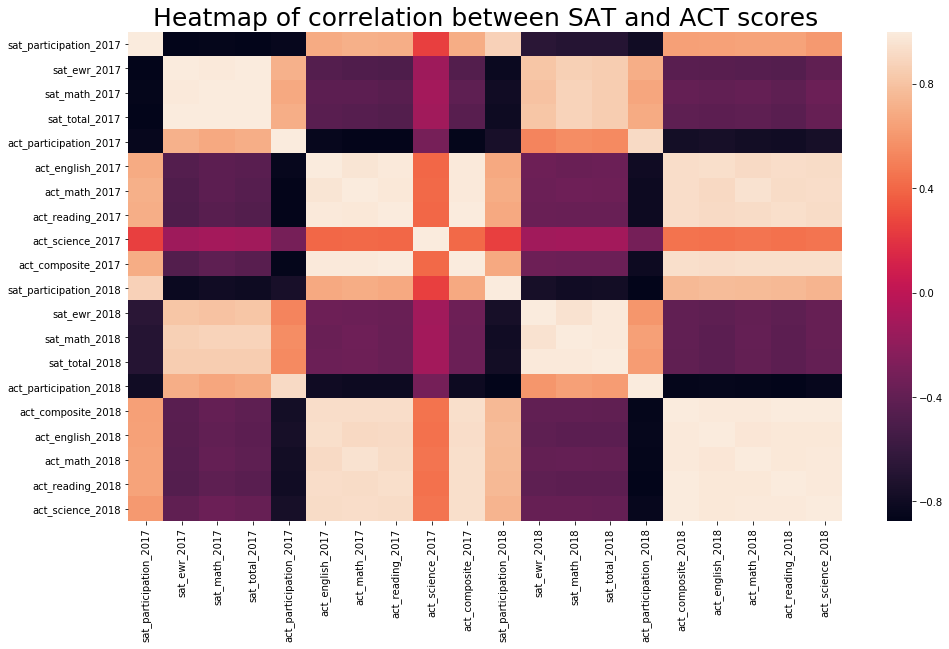

In [98]:
plt.figure(figsize=(16,9))

ax = sns.heatmap(final.corr()) 
ax.set_title("Heatmap of correlation between SAT and ACT scores", fontsize=25)
plt.savefig('../images/correlation.png'); 

### Interpreting the heatmap

#### SAT vs ACT participation rates

SAT participation rates seem to be strongly negatively correlated with ACT participation rates. This seems to suggest that when SAT participation rates are high, ACT participation rates are low, and vice versa. This might be because preparing for such tests tend to be laborious and students might prefer (or be advised) to focus on either one. 

#### Participation vs test scores

From the heatmap, SAT and ACT participation scores seem to be strongly negatively correlated with scores of individual test components and test totals. 

States with high participation rates for a given test probably have policies at the state level to encourage (or coerce) students into sitting for the test, and students might also be given support in preparing for the test. 

In states with low participation rates for a given test, the students taking that test may be doing so because they need to take that test to qualify for a prestigious university - which in turn suggests that these students are already doing well academically. There's a certain sense of self-selection bias - if the pool of test takers are almost all high performers, then overall test scores will probably also be high. On the other hand, in states with high participation rates for SAT, the distribution of test scores is more spread out because there would be a wider mix of high- and low-performing students. 

#### ACT 2017 Science score
Those two orangey-pink bars across the heatmap arise from the ACT 2017 Science score - this set of scores seem to be weakly correlated with all other numerical features, suggesting that it's a poor indicator of anything else. 

Interestingly, the ACT 2018 Science score does not appear to have a similarly stark effect. In 2018, the Science score correlates quite well with other ACT scores from that year, only strongly negatively correlated with the participation rate. 

This ACT 2018 Science score also seems to correlate strongly and positively with most ACT scores from 2017. Oddly, the ACT 2018 Science score and ACT 2017 Science score are quite weakly (although positively) correlated, which sounds very counter-intuitive. I would wonder if there was an issue with how the ACT Science test was structured/carried out that year that makes it such an anomaly. 

#### SAT vs ACT test scores
Individual and total/composite scores seem to be weakly negatively correlated between SAT and ACT. 


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,17), sharex=False, sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle("Histogram of {}".format(list_of_xlabels), fontsize=20)


    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists

        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=18)
        ax[i].set_xlabel(list_of_xlabels, fontsize=12)
        ax[i].set_ylabel("Number of States", fontsize=12)
        
        ax[i].axvline(dataframe[list_of_columns[i]].mean(), color='r', linestyle='dashed', linewidth=1) #we're showing the mean line here
        

        


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

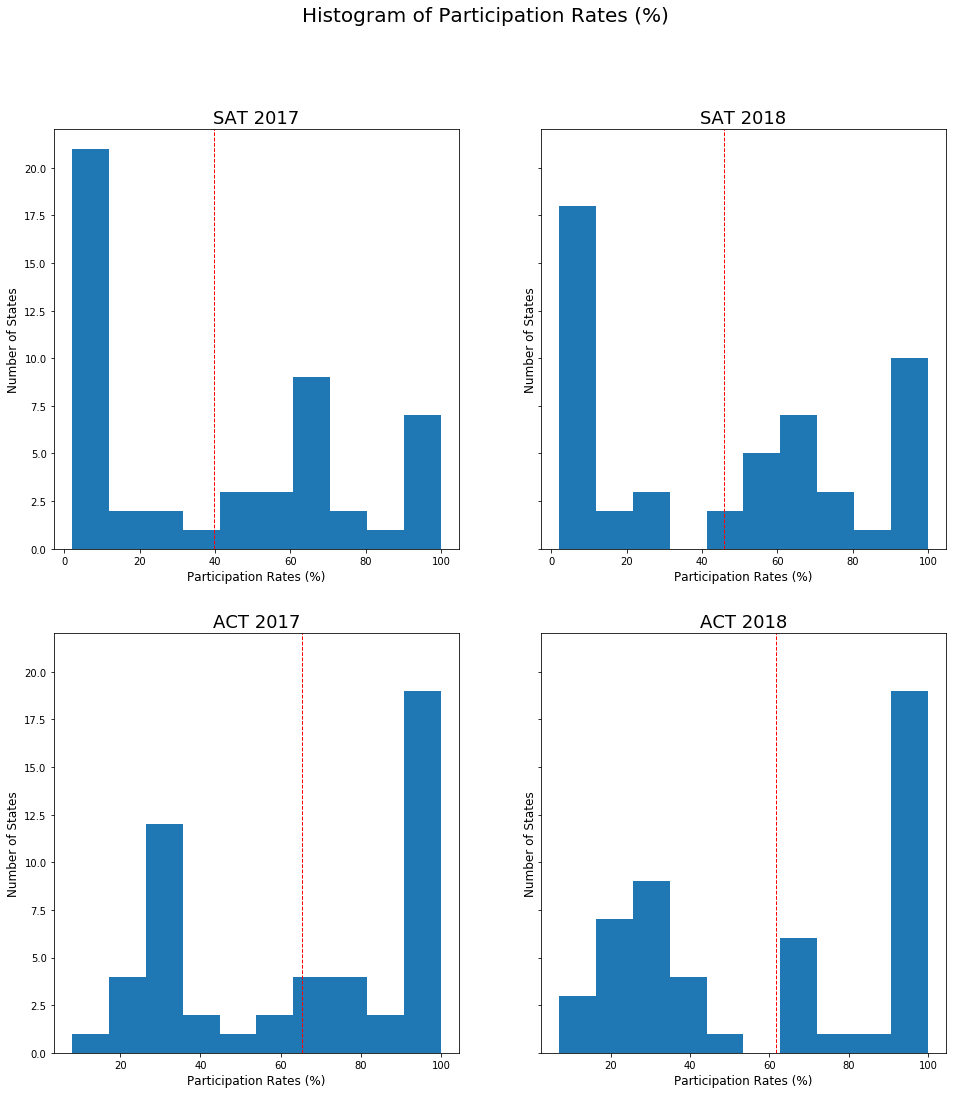

In [101]:
# Code

subplot_histograms(final, ["sat_participation_2017", "sat_participation_2018", "act_participation_2017", "act_participation_2018"], ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"], "Participation Rates (%)")

plt.savefig('../images/participation_hist.png'); 

#### Analysis

Comparing the two years of SAT data, we can see that participation rates have increased.

Comparing the two years of ACT data, we can see that participation rates have dropped.

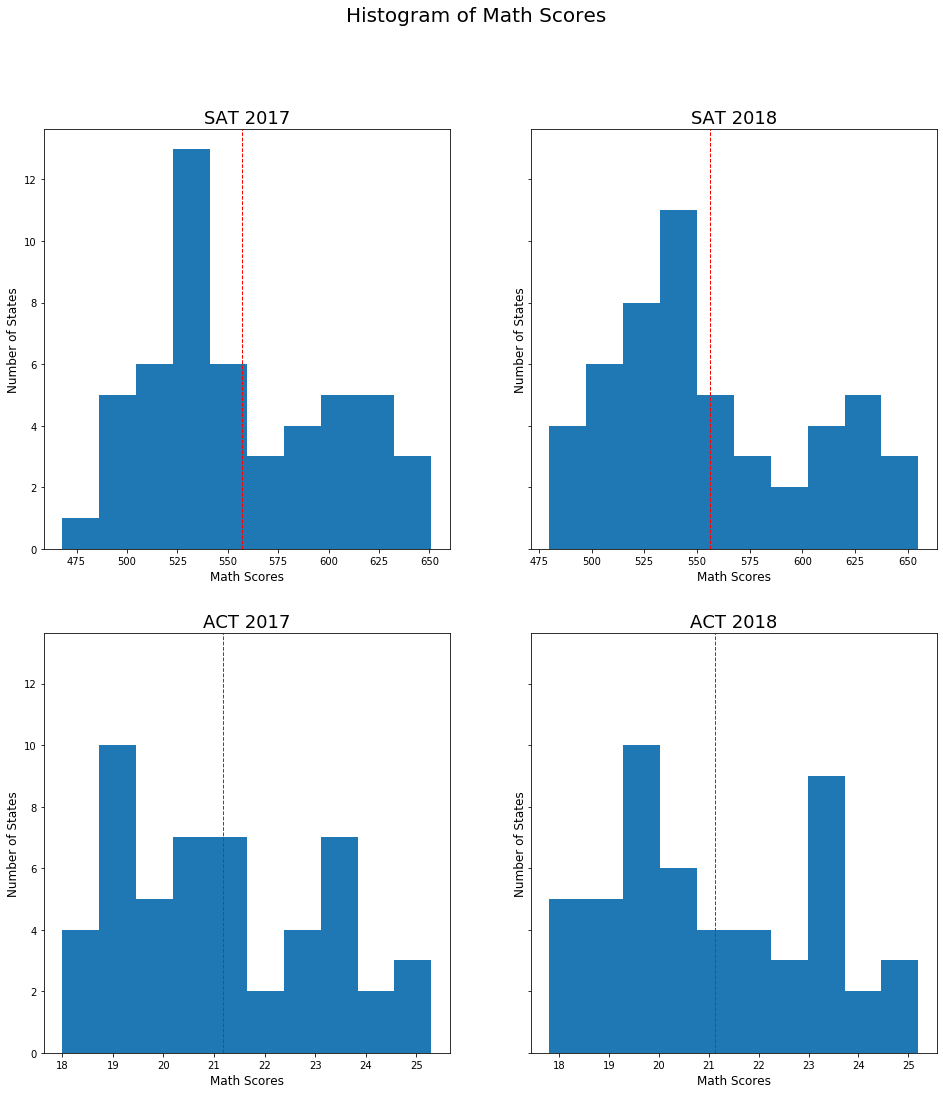

In [64]:
subplot_histograms(final, ["sat_math_2017", "sat_math_2018", "act_math_2017", "act_math_2018"], ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"], "Math Scores")

#### Analysis

Comparing the two years of SAT data, we can see that Math scores seem to have decreased slightly in 2018.

Comparing the two years of ACT data, we can see that Math scores seem to have improved slightly in 2018.

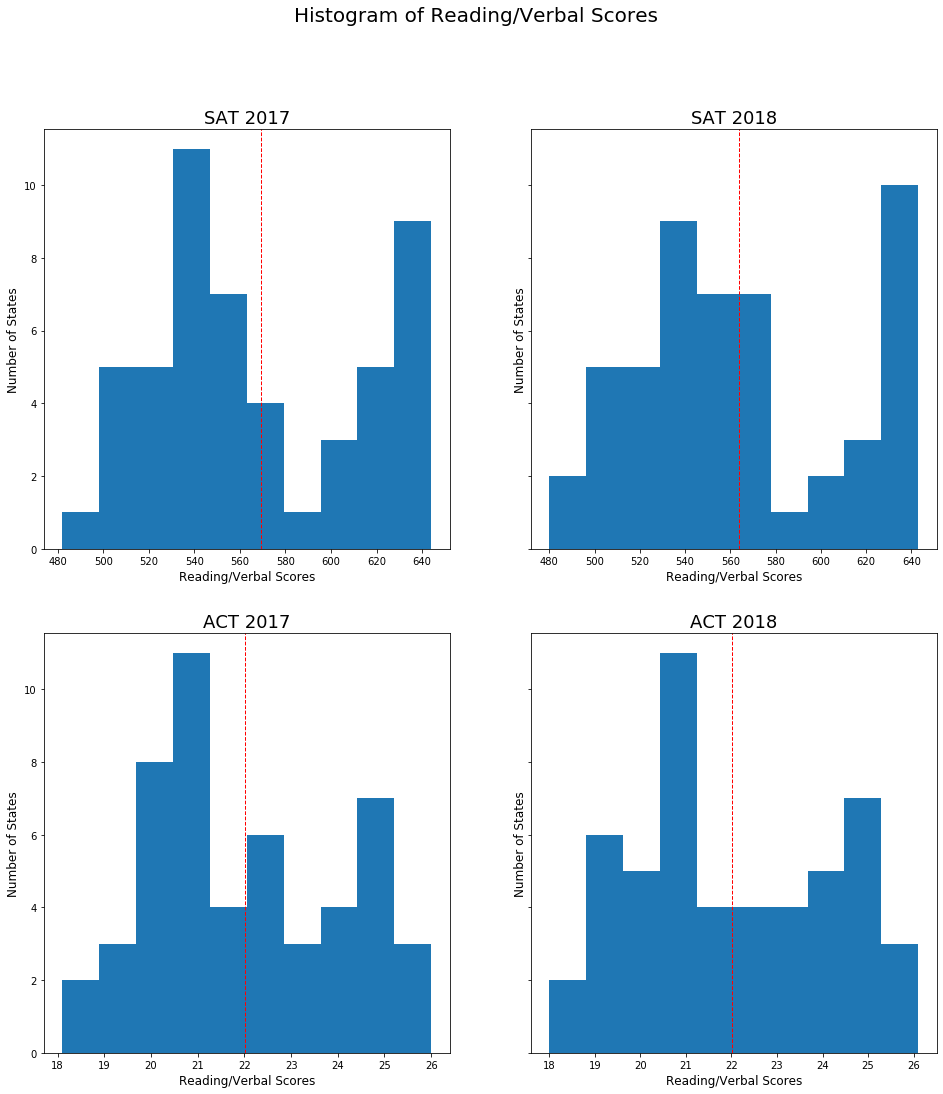

In [65]:
subplot_histograms(final, ["sat_ewr_2017", "sat_ewr_2018", "act_reading_2017", "act_reading_2018"], ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"], "Reading/Verbal Scores")

#### Analysis

Comparing the two years of SAT data, we can see that Reading/Verbal scores seem to improved in 2018.

Comparing the two years of ACT data, we can see that Reading/Verbal scores seem to improved in 2018.


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [66]:
def sns_scatter(df, var_1, var_2, x_label, y_label, fig_title):

    fig = sns.lmplot(x=var_1, y=var_2, data=df, height=6,)

    
    plt.title(fig_title, fontsize=18)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    corr_val = final[var_1].corr(final[var_2])
    
    print("Correlation between {} and {} is: {}.".format(var_1, var_2, corr_val))
                                 
        
    

Correlation between sat_math_2017 and act_math_2017 is: -0.42045603931931763.


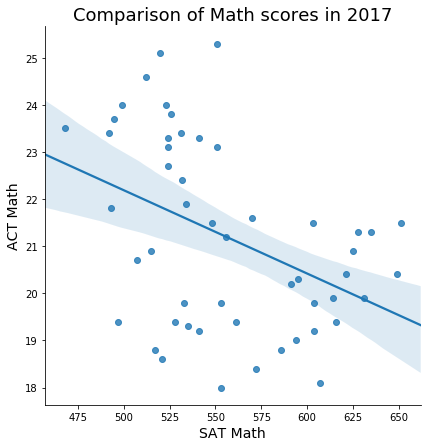

In [67]:
# comparing math scores
sns_scatter(
    final,
    "sat_math_2017", 
    "act_math_2017", 
    "SAT Math",
    "ACT Math",
    "Comparison of Math scores in 2017"
    )

#### Analysis:

Comparing Math scores, it seems like ACT and SAT scores might be weakly inversely correlated. States that score highly for Math in the SAT tend to have lower scores in the ACT and vice-versa.

Correlation between sat_ewr_2017 and act_reading_2017 is: -0.48844060052319943.


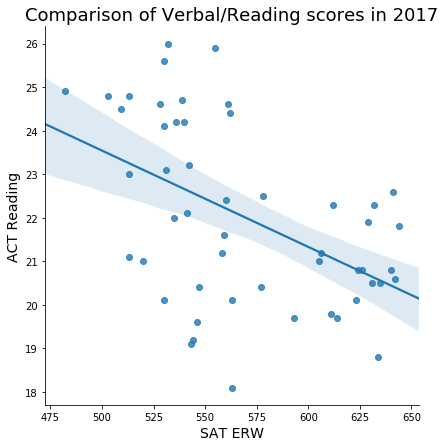

In [68]:
# comparing Verbal/Reading scores
sns_scatter(
    final,
    "sat_ewr_2017", 
    "act_reading_2017", 
    "SAT ERW",
    "ACT Reading",
    "Comparison of Verbal/Reading scores in 2017"
    )

#### Analysis:

Comparing Verbal/Reading scores, it seems like ACT and SAT scores might be weakly inversely correlated. States that score highly for EWR in the SAT tend to have lower scores in Reading for the ACT and vice-versa.

Correlation between sat_total_2017 and act_composite_2017 is: -0.4450201850999435.


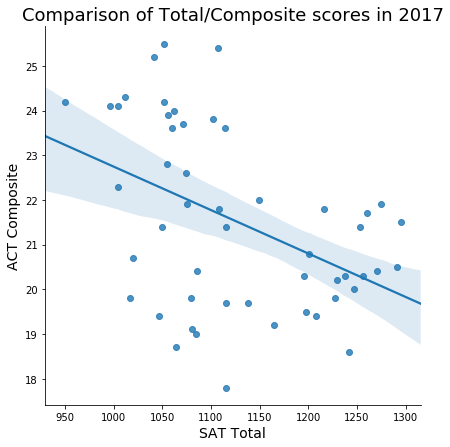

In [69]:
# comparing total/composite scores
sns_scatter(
    final,
    "sat_total_2017", 
    "act_composite_2017", 
    "SAT Total",
    "ACT Composite",
    "Comparison of Total/Composite scores in 2017"
    )

#### Analysis:

Comparing Total/Composite scores, it seems like ACT and SAT scores might be weakly inversely correlated. States that score highly in the SAT tend to have lower scores in the ACT and vice-versa.

Correlation between sat_total_2017 and sat_total_2018 is: 0.8527270956391397.


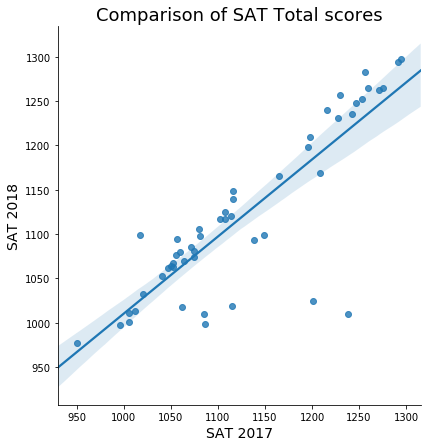

In [70]:
# comparing SAT Total scores
sns_scatter(
    final,
    "sat_total_2017", 
    "sat_total_2018", 
    "SAT 2017",
    "SAT 2018",
    "Comparison of SAT Total scores"
    )




#### Analysis:

Comparing 2017 vs 2018 SAT Total scores, it seems like there's a high positive correlation between years.

Correlation between act_composite_2017 and act_composite_2018 is: 0.9392710900917598.


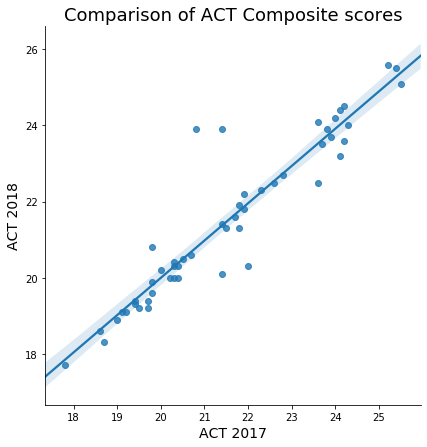

In [71]:
# comparing ACT Composite scores
sns_scatter(
    final,
    "act_composite_2017", 
    "act_composite_2018", 
    "ACT 2017",
    "ACT 2018",
    "Comparison of ACT Composite scores"
    )
    


#### Analysis:

Comparing 2017 vs 2018 ACT Composite scores, it seems like there's a high positive correlation between years.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [72]:
#function to create boxplots with fixed figsize and text sizes

def to_boxplot(mydf, title, ytitle, xticks, ylim):
    
    plt.figure(figsize=(12,8))
    ax = sns.boxplot(data=mydf, showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"white"}) #mean is indicated on the graphs by the white triangles
    ax.set_title(title, size=18)
    ax.set_ylabel(ytitle,size=15)
    ax.set_ylim(ylim)
    
    ax.set_xticklabels(xticks,size=15)
    
    

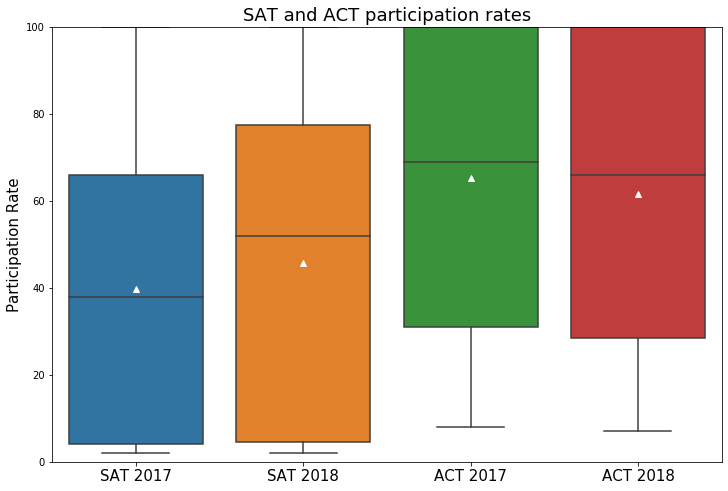

In [99]:
# comparing participation rates

to_boxplot(
    final[["sat_participation_2017", "sat_participation_2018", "act_participation_2017", "act_participation_2018"]], 
    "SAT and ACT participation rates", 
     "Participation Rate",  
    ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"],
    [0,100]
    )

plt.savefig('../images/participation_boxplot.png'); 

#### Analysis:
From this set of boxplots, it's evident that median SAT participation rates across both years are significantly lower than for ACT. Most states seem to tend to favour ACT instead. 

That said, SAT participation rates seem to have improved considerably in 2018, given the higher median. For ACT, we see a small dip in the median in 2018, but it's not obvious from the boxplot alone if the difference is significant. 

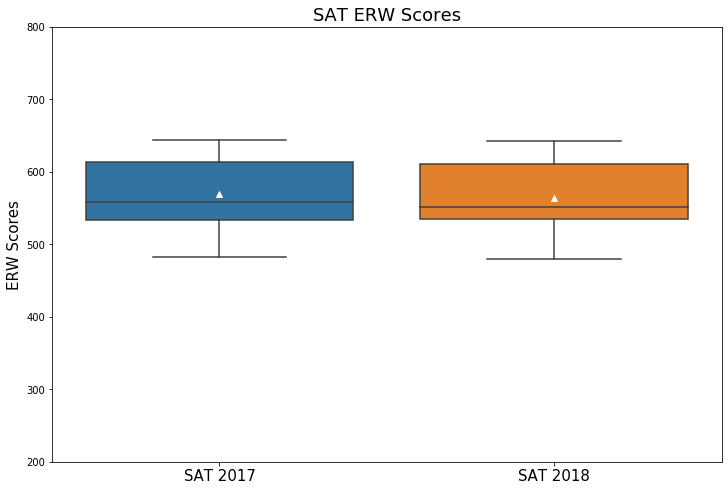

In [74]:
# comparing ERW scores for SAT

to_boxplot(
    final[["sat_ewr_2017", "sat_ewr_2018"]], 
    "SAT ERW Scores", 
     "ERW Scores",  
    ["SAT 2017", "SAT 2018"],
    [200,800]
    )

#### Analysis:
There's a slight dip in median ERW scores between SAT 2017 and 2018, but the interquatile range is very similar. 

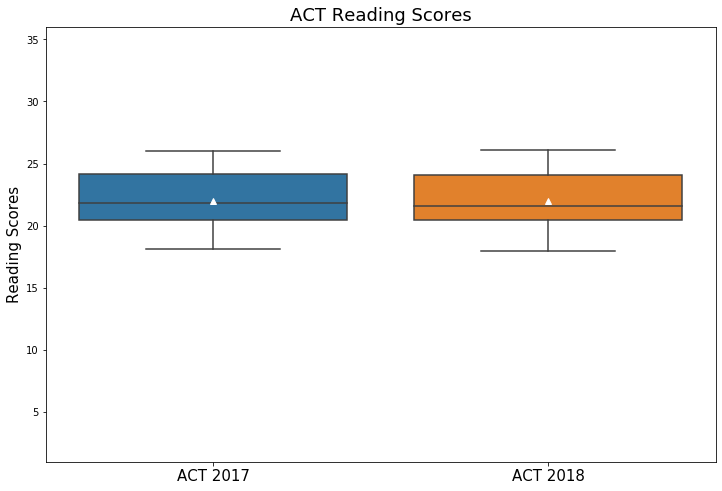

In [75]:
# comparing Reading scores for ACT

to_boxplot(
    final[["act_reading_2017", "act_reading_2018"]], 
    "ACT Reading Scores", 
     "Reading Scores",  
    ["ACT 2017", "ACT 2018"],
    [1,36]
    )

#### Analysis:

For ACT, there's a small dip in median Reading scores that may or may not be significant. THe interquatile range is very similar. 

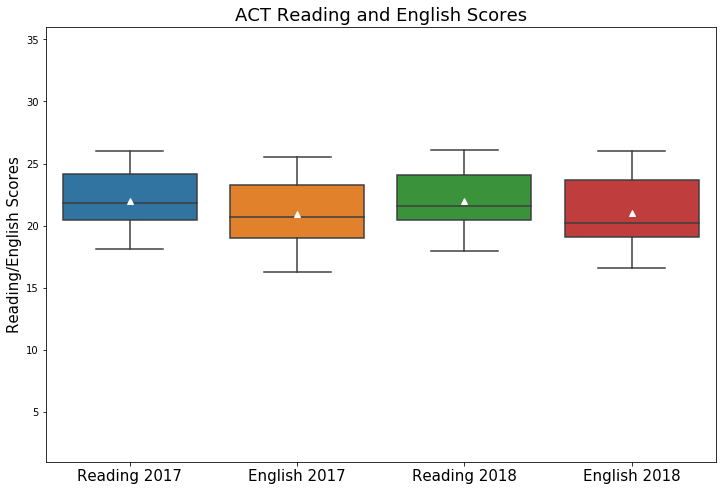

In [76]:
# comparing English and Reading scores for ACT

to_boxplot(
    final[["act_reading_2017", "act_english_2017", "act_reading_2018", "act_english_2018"]], 
    "ACT Reading and English Scores", 
     "Reading/English Scores",  
    ["Reading 2017", "English 2017", "Reading 2018", "English 2018"],
    [1,36]
    )

#### Analysis:
Looking back at the heatmap, it would seem that ACT English and ACT Reading are strongly positively correlated. 

But looking at the boxplot, it seems like states tend to do better in Reading (i.e. higher median scores for each year) than in English. Perhaps students are better at understanding texts, than in the finer points of grammar and spelling. 

Reading scores seems quite stable from year to year. But for English, we see a small dip (whether that difference is significant is yet to be determined) in 2018, and the interquartile range has also widened. 


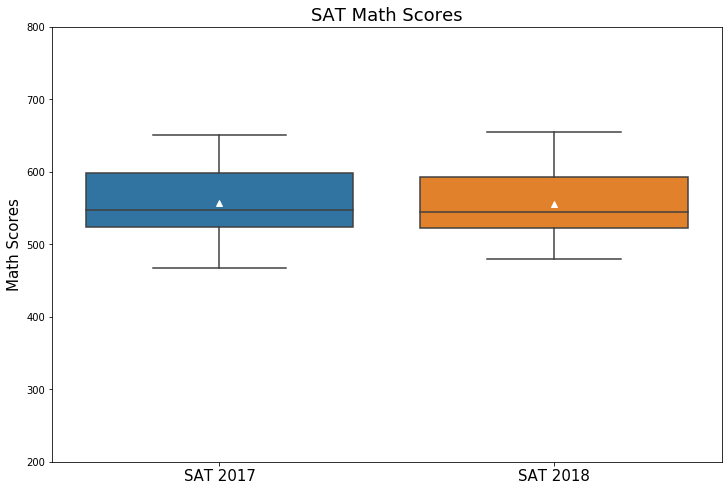

In [77]:
# comparing Math scores for SAT

to_boxplot(
    final[["sat_math_2017", "sat_math_2018"]], 
    "SAT Math Scores", 
     "Math Scores",  
    ["SAT 2017", "SAT 2018"],
    [200,800]
    )

#### Analysis:
There's a slight dip in median Math scores between SAT 2017 and 2018. The interquatile range has shrunk a bit in 2018 too.

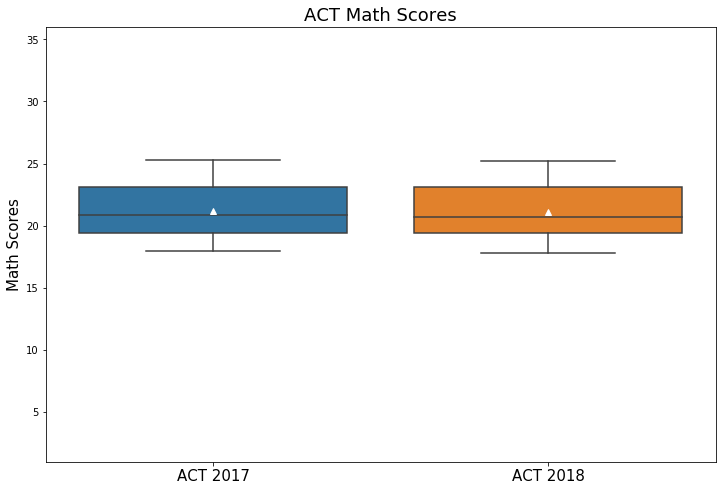

In [78]:
# comparing Math scores for ACT

to_boxplot(
    final[["act_math_2017", "act_math_2018"]], 
    "ACT Math Scores", 
     "Math Scores",  
    ["ACT 2017", "ACT 2018"],
    [1,36]    
    )

#### Analysis:

Again,there's a small dip in median Math scores for ACT, that may or maynot be significant. THe interquatile range is very similar. 

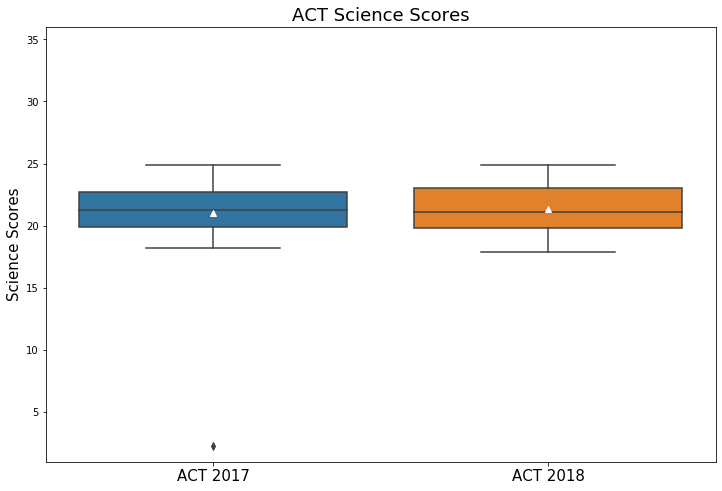

In [79]:
# comparing Science scores for ACT

to_boxplot(
    final[["act_science_2017", "act_science_2018"]], 
    "ACT Science Scores", 
     "Science Scores",  
    ["ACT 2017", "ACT 2018"],
    [1,36]
    )

In [80]:
final["act_science_2017"].idxmin()

'Maryland'

In [81]:
final.sort_values("act_science_2017").head()

,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,,,,,,,,,,,
Maryland,69.0,536.0,524.0,1060.0,28.0,23.3,23.1,24.2,2.3,23.6,76.0,545.0,535.0,1080.0,31.0,22.5,22.1,22.0,23.1,22.2
Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9
Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547.0,523.0,1070.0,100.0,18.3,17.3,18.2,18.6,18.5
North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554.0,543.0,1098.0,100.0,19.1,18.0,19.3,19.5,19.2


We realised from the boxplot that ACT 2017 has a very extreme outlier, and now we've identified that to be Maryland.

#### Analysis:
ACT Science scores are also quite similar across years, with a teeny dip in median in 2018 and slightly wider IQR.

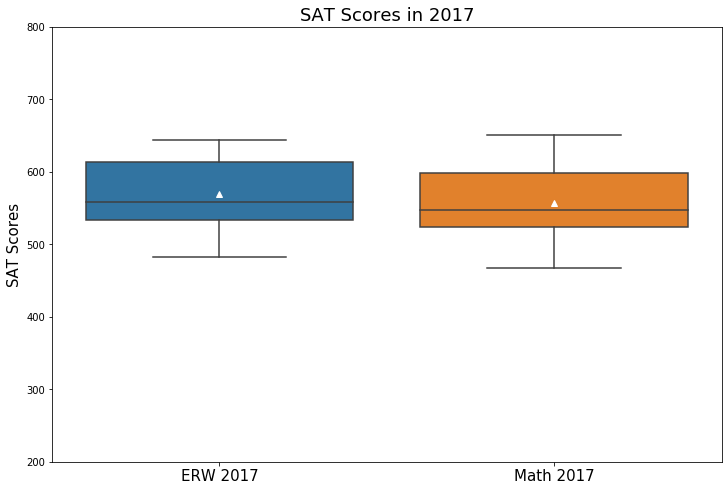

In [82]:
# comparing SAT ERW and Math scores for 2017

to_boxplot(
    final[["sat_ewr_2017", "sat_math_2017"]], 
    "SAT Scores in 2017", 
     "SAT Scores",  
    ["ERW 2017", "Math 2017"],
    [200,800]
    )

#### Analysis:
Students tend to fare slightly better for ERW than for Math in 2017. We will need to see if the difference is significant.

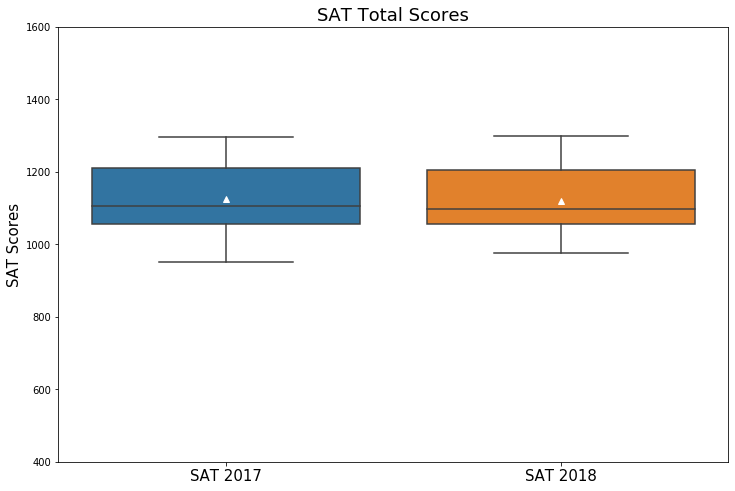

In [83]:
# comparing SAT Total scores for 2017 and 2018

to_boxplot(
    final[["sat_total_2017", "sat_total_2018"]], 
    "SAT Total Scores", 
     "SAT Scores",  
    ["SAT 2017", "SAT 2018"],
    [400,1600]
    )

#### Analysis:
SAT Total scores seem quite stable from year to year.

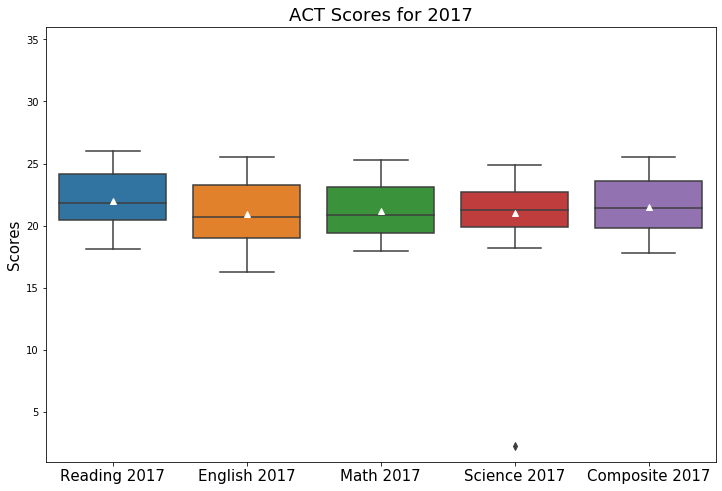

In [100]:
# comparing ACT scores for 2017

to_boxplot(
    final[["act_reading_2017", "act_english_2017", "act_math_2017", "act_science_2017", "act_composite_2017"]], 
    "ACT Scores for 2017", 
     "Scores",  
    ["Reading 2017", "English 2017", "Math 2017", "Science 2017", "Composite 2017"],
    [1,36]
    )
plt.savefig('../images/ACT_all_2017.png'); 

#### Analysis:
Given the IQR and lower median value, it might seem as if English is a weaker topic for ACT takers than other subject areas. But looking across the various ACT components, it seems that student tend to fare somewhat evenly across subject areas.

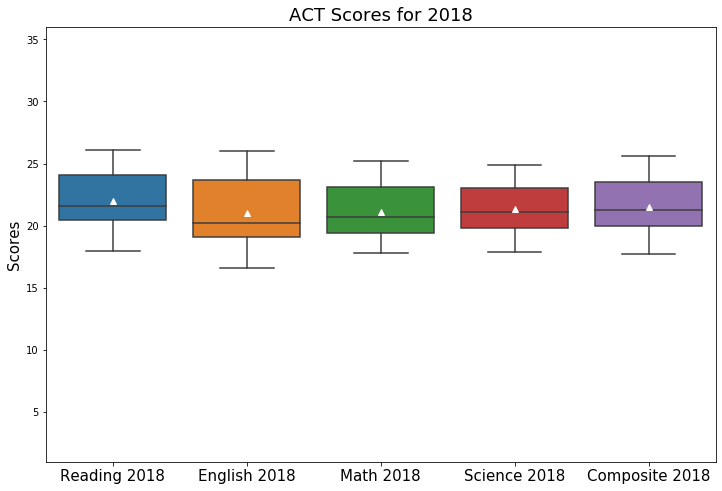

In [85]:
# comparing ACT scores for 2019

to_boxplot(
    final[["act_reading_2018", "act_english_2018", "act_math_2018", "act_science_2018", "act_composite_2018"]], 
    "ACT Scores for 2018", 
     "Scores",  
    ["Reading 2018", "English 2018", "Math 2018", "Science 2018", "Composite 2018"],
    [1,36]
    )

#### Analysis: 

While there are minute shifts up and down for individual ACT components from 2017 to 2018, the general picture is very similar. The only noticeable difference is that there's no outlier in Science in 2018.

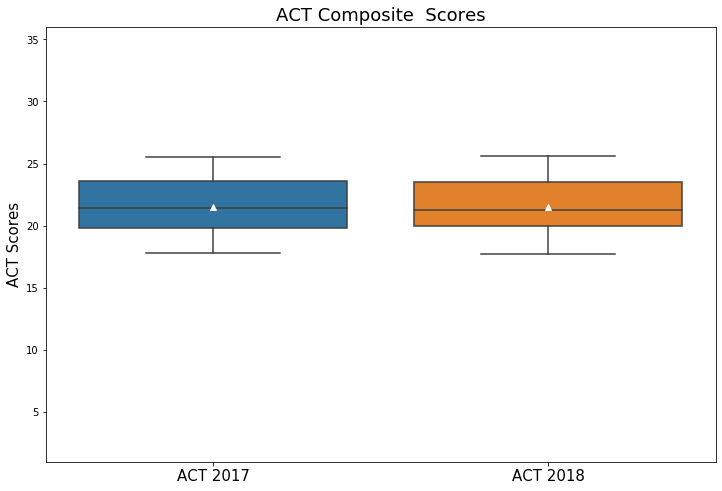

In [86]:
# comparing ACT Compsoite scores for 2017 and 2018

to_boxplot(
    final[["act_composite_2017", "act_composite_2018"]], 
    "ACT Composite  Scores", 
     "ACT Scores",  
    ["ACT 2017", "ACT 2018"],
    [1,36]
    )

#### Analysis:
ACT scores also seem quite stable from year to year.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Correlation between sat_participation_2017 and act_participation_2017 is: -0.8412344644539914.
Correlation between sat_participation_2018 and act_participation_2018 is: -0.8681027838333779.


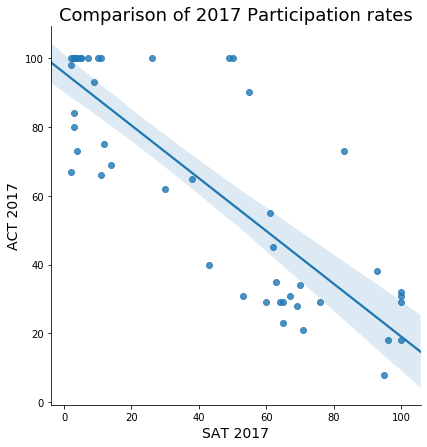

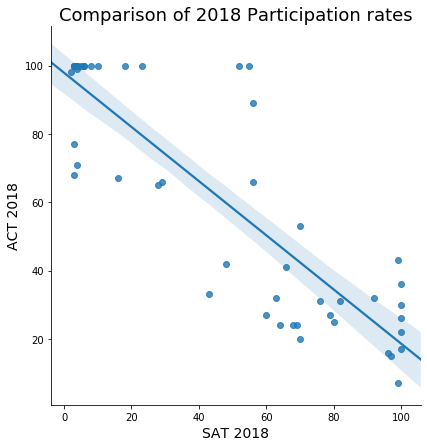

In [87]:
# comparing participation rates between SAT and ACT 

sns_scatter(
    final,
    "sat_participation_2017", 
    "act_participation_2017", 
    "SAT 2017",
    "ACT 2017",
    "Comparison of 2017 Participation rates"
    )



sns_scatter(
    final,
    "sat_participation_2018", 
    "act_participation_2018", 
    "SAT 2018",
    "ACT 2018",
    "Comparison of 2018 Participation rates"
    )



Here, it's quite evident that SAT participation score is negatively and strongly correlated with a correlation score of approximately -0.85 (average between two years of data)

Correlation between sat_ewr_2017 and sat_math_2017 is: 0.9870560237079127.
Correlation between sat_ewr_2018 and sat_math_2018 is: 0.9546606060379668.


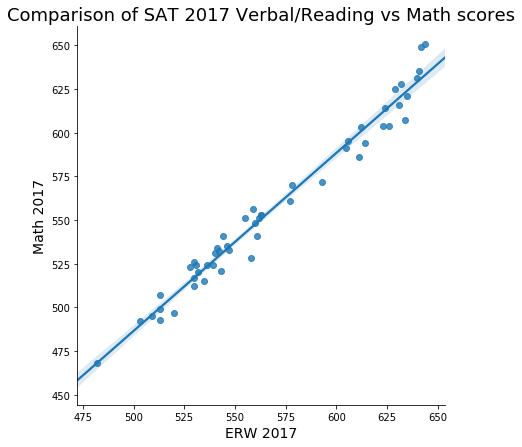

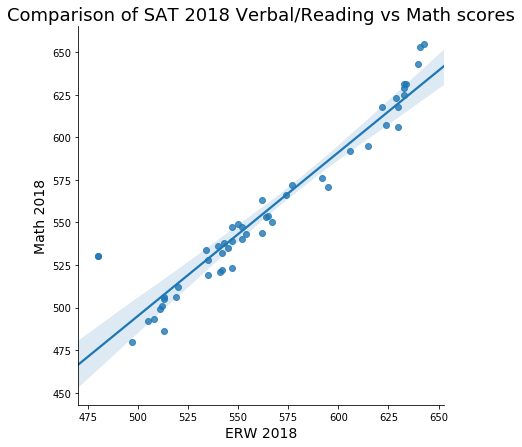

In [102]:
# comparing  SAT Verbal/Reading and Math scores

sns_scatter(
    final,
    "sat_ewr_2017", 
    "sat_math_2017",
    "ERW 2017",
    "Math 2017",
    "Comparison of SAT 2017 Verbal/Reading vs Math scores"
    )

plt.savefig('../images/Verbal-Math_scatter.png'); 

sns_scatter(
    final,
    "sat_ewr_2018", 
    "sat_math_2018",
    "ERW 2018",
    "Math 2018",
    "Comparison of SAT 2018 Verbal/Reading vs Math scores"
    )


Correlation between act_reading_2017 and act_math_2017 is: 0.9796301401024311.
Correlation between sat_ewr_2018 and sat_math_2018 is: 0.9546606060379668.


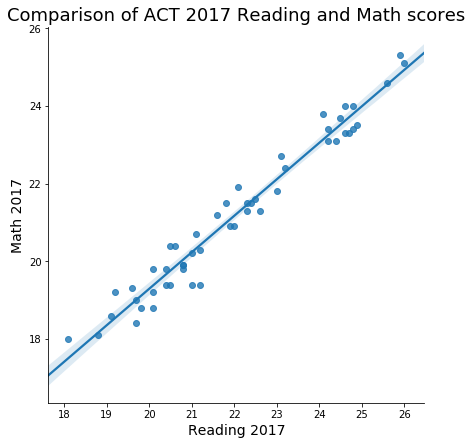

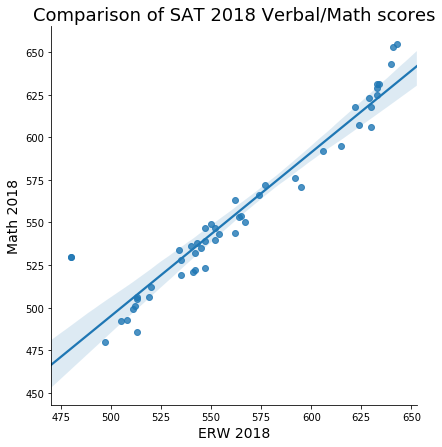

In [89]:
# comparing ACT Verbal/Reading and Math scores

sns_scatter(
    final,
    "act_reading_2017", 
    "act_math_2017",
    "Reading 2017",
    "Math 2017",
    "Comparison of ACT 2017 Reading and Math scores"
    )


sns_scatter(
    final,
    "sat_ewr_2018", 
    "sat_math_2018",
    "ERW 2018",
    "Math 2018",
    "Comparison of SAT 2018 Verbal/Math scores"
    )

Correlation between act_reading_2017 and act_science_2017 is: 0.40109722216530636.
Correlation between act_reading_2018 and act_science_2018 is: 0.9882271063704524.


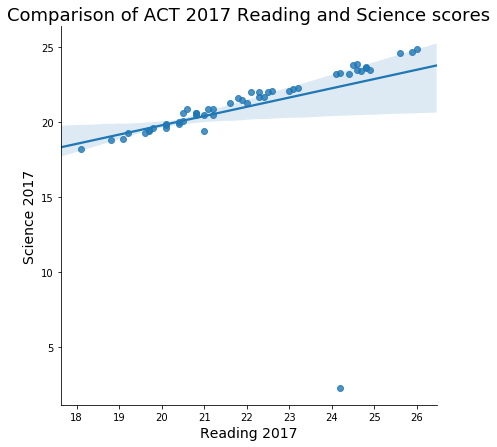

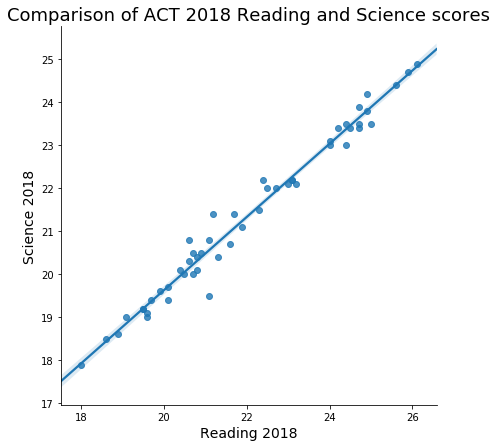

In [90]:
# comparing ACT Verbal/Reading and Science scores

sns_scatter(
    final,
    "act_reading_2017", 
    "act_science_2017",
    "Reading 2017",
    "Science 2017",
    "Comparison of ACT 2017 Reading and Science scores"
    )


sns_scatter(
    final,
    "act_reading_2018", 
    "act_science_2018",
    "Reading 2018",
    "Science 2018",
    "Comparison of ACT 2018 Reading and Science scores"
    )

Correlation between act_reading_2017 and act_english_2017 is: 0.9859985193416778.
Correlation between act_reading_2018 and act_english_2018 is: 0.9833899510895149.


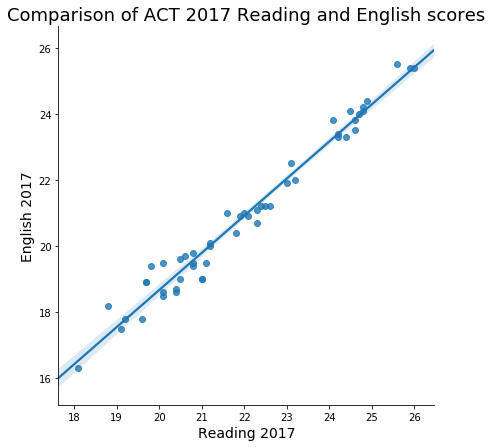

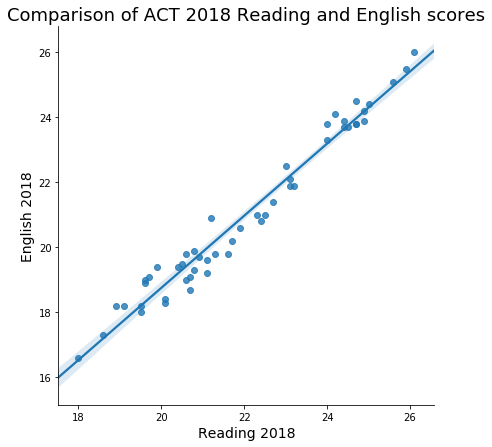

In [91]:
# comparing ACT Verbal vs Englih scores

sns_scatter(
    final,
    "act_reading_2017", 
    "act_english_2017",
    "Reading 2017",
    "English 2017",
    "Comparison of ACT 2017 Reading and English scores"
    )


sns_scatter(
    final,
    "act_reading_2018", 
    "act_english_2018",
    "Reading 2018",
    "English 2018",
    "Comparison of ACT 2018 Reading and English scores"
    )

#### Analysis:

A common refrain is that people who do well in Verbal/Reading/English tend to do poorly in Math and Science.

Verbal/Reading and English - the former is more about comprehension, the latter more about grammar and spelling - are strongly positively correlated with correlation scores around 0.96. 

Verbal/Reading and English performance is also strongly positively correlated with Math performance. 

For Science, however, it's hard to be conclusive as the 2017 suggests a weak positive correlation, wheras the 2018 data suggets a strong positive correlation. 

But the bottom line - the idea that Verbal/Reading/English is dichotomous with Math is statistically false.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [92]:
final.describe()

,sat_participation_2017,sat_ewr_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_ewr_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


##### Answers:


##### Participation Rates
Median SAT participation rates (38% in 2017, 52% in 2018) are generally lower than median ACT participation rates (69% in 2017, 66% in 2018). Of the four features (SAT 2017, ACT 2017, SAT 2018, ACT 2018), three are quite symmetrical and have similar spreads (35.28%, 32.14%, 34.08% ); however  SAT 2018 is noticeably skewed to the left with a wider spread (37.31%). That said, keeping in mind the histogram shapes, the afore-mentioned three features are not normally distributed, in spite of the symmetrical boxplots. 

##### English Scores

Again, looking at the histograms, none of the Reading/Verbal (ERW) features are normally distributed. 

SAT ERW scores maintain similar mean (569.11 vs 563.69 in 2017 and 2018), median (559 vs 552) and spread (45.67, 47.50) across the two years, and are slightly skewed to the right; the mean is also slightly above the median for both years. The spread is quite narrow. 

ACT Reading scores also maintain similar mean (22.01 vs 22.02), median (21.08, 21.60) and spread (2.07 vs 2.17) across the two years, and also slightly skewed to the right. The mean is quite close to the median. The spread is even narrower for ACT Reading scores compared to SAT's ERW scores. 

#### ACT Reading and English scores
Generally, Reading scores tend to do better in terms of mean and median compared to the English scores. 

In 2017, the mean and median score for both Reading and English lie quite closely together, and the spreads were rather narrow and symmetrical.

In 2018, there was a slight change in results. Spreads remained fairly narrow, but were now a bit more skewed to the right. Mean score also rose slightly higher than median for both Reading and English.  

##### Math scores
For SAT, mean (556.89 vs 556.23), median (548.00 vs 544.00) and spread (47.12 vs 47.77) are similar for both years. The spread is relatively narrow, though skewed to the left. The mean is above the median.

For ACT, mean (21.18 vs 21.13), median (20.90 vs 20.70) and spread (1.98 vs 2.035) also remain similar between the two years. The spread is relatively narrow, and more symmetrical compared to the spread in SAT. As with the SAT, the mean for each year's ACT Math score lies above the median, but is much closer to the median. 

#### Science scores
For both years , the spread (3.18 vs 1.87) for ACT Science scores are quite narrow and symmetrical, though the 2018 scores have a slightly wider spread. In 2017, the mean (21.04) was below the median (21.30), and in 2018, the mean (21.34) was almost overlapping with the median (21.10). 

#### Total/Composite scores
For SAT, the mean (1126.10 vs 1120.02), median (1107.00 vs 1098.00) and spread (92.49 vs 94.15) of the Total scores were similar for both years with fairly narrow spreads that were slightly skewed to the right. Means for both years lie above the median.

For ACT, the mean (21.52 vs 21.48), median (21.40 vs 21.30) and spread (2.02 vs 2.10) of the Composite scores were also similar between one year and the other. The spreads are narrow, and quite symmetrical; the mean for both years also lie very closely to the median. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

#### Answers:

Based on the histograms plotted for each of the numeric columns, it appears that the features do not follow a normal distribution. Given the wide IQR for Participation scores for both ACT and SAT, there is a lot of variance in the sizes of sample sets (i.e. each state). And without knowing if the minimum sample size even meets the requirement for the Central Limit Theorem (n>=30), it seems unlikely that the features are normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

#### Answer:
No. If the Participation rate, which already pertains to the sample size, fluctuates from state to state quite a bit, we can continue to expect that the other features, by virtue of having the sample sample sizes, wouldn't be normal

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [93]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [94]:
# let's juxtapose two years of each score for ease of reference

comp_df = final[[
    "sat_participation_2017", "sat_participation_2018",
    "act_participation_2017", "act_participation_2018", 
    "sat_ewr_2017", "sat_ewr_2018",
    "act_reading_2017", "act_reading_2018",
    "act_english_2017", "act_english_2018", 
    "sat_math_2017", "sat_math_2018",
    "act_math_2017", "act_math_2018",
    "act_science_2017", "act_science_2018",
    "sat_total_2017" , "sat_total_2018",
    "act_composite_2017", "act_composite_2018"
    ]]
comp_df.head(10)

,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018,sat_ewr_2017,sat_ewr_2018,act_reading_2017,act_reading_2018,act_english_2017,act_english_2018,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018,act_science_2017,act_science_2018,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,6.0,100.0,100.0,593.0,595.0,19.7,19.6,18.9,18.9,572.0,571.0,18.4,18.3,19.4,19.0,1165.0,1166.0,19.2,19.1
Alaska,38.0,43.0,65.0,33.0,547.0,562.0,20.4,21.6,18.7,19.8,533.0,544.0,19.8,20.6,19.9,20.7,1080.0,1106.0,19.8,20.8
Arizona,30.0,29.0,62.0,66.0,563.0,577.0,20.1,19.5,18.6,18.2,553.0,572.0,19.8,19.4,19.8,19.2,1116.0,1149.0,19.7,19.2
Arkansas,3.0,5.0,100.0,100.0,614.0,592.0,19.7,19.7,18.9,19.1,594.0,576.0,19.0,18.9,19.5,19.4,1208.0,1169.0,19.4,19.4
California,53.0,60.0,31.0,27.0,531.0,540.0,23.1,23.0,22.5,22.5,524.0,536.0,22.7,22.5,22.2,22.1,1055.0,1076.0,22.8,22.7
Colorado,11.0,100.0,100.0,30.0,606.0,519.0,21.2,24.4,20.1,23.9,595.0,506.0,20.3,23.2,20.9,23.5,1201.0,1025.0,20.8,23.9
Connecticut,100.0,100.0,31.0,26.0,530.0,535.0,25.6,26.1,25.5,26.0,512.0,519.0,24.6,24.8,24.6,24.9,1041.0,1053.0,25.2,25.6
Delaware,100.0,100.0,18.0,17.0,503.0,505.0,24.8,24.5,24.1,23.7,492.0,492.0,23.4,23.1,23.6,23.4,996.0,998.0,24.1,23.2
District of Columbia,100.0,92.0,32.0,32.0,482.0,497.0,24.9,24.4,24.4,23.7,468.0,480.0,23.5,22.7,23.5,23.0,950.0,977.0,24.2,23.6


Here, we can see that Colorado seems to have made a huge jump in SAT participation rates, going from 11% in 2017 to 100% in 2018. Interesting, the SAT total score seemed to have changed in an inverse manner, decreasing from 1201.0 in 2017 to 1025.0. 


Alaska also had a significant change in ACT participation rate, decreasing sharpy from 65% to 33%. However, changes in Alaska's ACT composite score don't appear to be significantly different.

In [95]:
comp_df.tail(10)

,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018,sat_ewr_2017,sat_ewr_2018,act_reading_2017,act_reading_2018,act_english_2017,act_english_2018,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018,act_science_2017,act_science_2018,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
state,,,,,,,,,,,,,,,,,,,,
South Dakota,3.0,3.0,80.0,77.0,612.0,622.0,22.3,22.4,20.7,20.8,603.0,618.0,21.5,21.6,22.0,22.2,1216.0,1240.0,21.8,21.9
Tennessee,5.0,6.0,100.0,100.0,623.0,624.0,20.1,19.9,19.5,19.4,604.0,607.0,19.2,19.1,19.9,19.6,1228.0,1231.0,19.8,19.6
Texas,62.0,66.0,45.0,41.0,513.0,520.0,21.1,21.1,19.5,19.6,507.0,512.0,20.7,20.6,20.9,20.8,1020.0,1032.0,20.7,20.6
Utah,3.0,4.0,100.0,100.0,624.0,480.0,20.8,20.9,19.5,19.7,614.0,530.0,19.9,19.9,20.6,20.5,1238.0,1010.0,20.3,20.4
Vermont,60.0,64.0,29.0,24.0,562.0,565.0,24.4,24.9,23.3,23.9,551.0,554.0,23.1,23.4,23.2,23.8,1114.0,1120.0,23.6,24.1
Virginia,65.0,68.0,29.0,24.0,561.0,567.0,24.6,24.7,23.5,23.8,541.0,550.0,23.3,23.3,23.5,23.5,1102.0,1117.0,23.8,23.9
Washington,64.0,69.0,29.0,24.0,541.0,543.0,22.1,22.7,20.9,21.4,534.0,538.0,21.9,22.2,22.0,22.0,1075.0,1081.0,21.9,22.2
West Virginia,14.0,28.0,69.0,65.0,558.0,513.0,21.2,21.3,20.0,19.8,528.0,486.0,19.4,19.4,20.5,20.4,1086.0,999.0,20.4,20.3
Wisconsin,3.0,3.0,100.0,100.0,642.0,641.0,20.6,20.6,19.7,19.8,649.0,653.0,20.4,20.3,20.9,20.8,1291.0,1294.0,20.5,20.5


Here, Utah's SAT TOTAL score decreased quite a lot from 1238.0 to 1010.0. From checking Utah's SAT participaton score, we find that participation increased from 3% to 4%. 

This again seems in line with the idea that participation rates and test performance are negatively correlated.

From external research (see links on SAT/ACT prepartory site [Testive](https://www.testive.com/colorado-sat-change-2017/) and the [Denver Post](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/), we learn that from 2017, all students in Colorado are required to sit for the SAT, which explains the sudden jump to 100% participation rate in 2018. It's worth keeping in mind that when we say "SAT 2017", this is actually referring to results of SAT tests sat for  in 2016-2017; which also explains why the effect of this 2017 ruling only showed up in the SAT 2018 results.

In Alaska, on the other hand, a ruling passed in mid-2016 (as reported in the [Anchorage Daily News](https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/) that students in Alaska were no longer required to pass the SAT or ACT tests to graduate. While it's not known from current data if participation rates already declined from 2016 to 2017, it's logical to infer that the decline from 2017 to 2018 is a result of this change in regulations. 





## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

While it appears that a sudden increase in test participaton might bring down overall state averages in scores, I do believe that in general, sitting for either test is beneficial for students looking to continue into college. 

This sentiment is backed by growing research that state-mandated requirements to take a college entrance exam are associated with increases in overall college enrolments. In [one study by Joshua M. Hyman](https://www.mitpressjournals.org/doi/full/10.1162/EDFP_a_00206), an assistant professor of public policy at the University of Connecticut, Hyman found that for every 1,000 students who performed well when a test was optional, an additional 480 also did well when the test became mandatory. These studies suggest that there's a sizeable population of high-ability students who might have been underestimating their candidacy for college when tests were optional - a trend that possibly resonates among low-income students. Hence, one way to make these high-ability low-income students a fighting chance at college is to make college entrance tests accessible. 

Perhaps the most effective approach to dramatically improve participation rates is for states to provide one of the tests free-of-chrage to students, and preferably administer the test during school hours on school premises - effectively, removing as many external barriers as possible from testing. The College Board, which administers the SAT, has also partnered with online learning platform Khan Academy to offer free SAT preparation courses, which serves to reduce another barrier-to-entry for low-income students.

Understandably, when there's a sudden spike in participation rates, average scores may go down. Judging purely on two consecutive years of data, it would seem that higher participation rates are detrimental to test-takers, but I suspect it's a short-term, "growing pain" effect that would disappear in a few years, once participation rates have stabilised. Hence, it'll be better to look into data from the next 5 years at least. Furthermore, we may also want to look at the percentage change in number of students who attended college in each state to verify that mandating a college entrance test is beneficial in improving college-attending numbers.


